In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
optimum = {}

best = pd.read_csv('data/find_best.csv')
for ((size, pin), group) in best.groupby(['size', 'pin']):
    best_energy = group['energy'].min()
    best_row = group[group['energy'].eq(best_energy)].iloc[0]
    optimum[(int(size),bool(pin))] = int(best_row['threads'])

print(optimum)

{(500, False): 16, (500, True): 16, (550, False): 16, (550, True): 16, (600, False): 16, (600, True): 16, (650, False): 15, (650, True): 16, (700, False): 15, (700, True): 16, (750, False): 15, (750, True): 16, (800, False): 16, (800, True): 16, (850, False): 14, (850, True): 15, (900, False): 16, (900, True): 16, (950, False): 16, (950, True): 15, (1000, False): 16, (1000, True): 16, (1050, False): 16, (1050, True): 16, (1100, False): 8, (1100, True): 12, (1150, False): 15, (1150, True): 14, (1200, False): 9, (1200, True): 12, (1250, False): 8, (1250, True): 12, (1500, False): 8, (1500, True): 12, (1750, False): 8, (1750, True): 12, (2000, False): 8, (2000, True): 12, (2250, False): 8, (2250, True): 12, (2500, False): 8, (2500, True): 12}


In [55]:
fast = pd.read_csv('data/adapt_fast.csv')
slow = pd.read_csv('data/adapt_slow.csv')

fast['optimum'] = fast.apply(lambda x: optimum[(x['size'], x['pin'])], axis=1)
slow['optimum'] = slow.apply(lambda x: optimum[(x['size'], x['pin'])], axis=1)

fast

,size,pin,threads,runtime,usertime,energy,optimum
0,500,False,16,0.047744,0.732265,2.035029,16
1,500,False,16,0.047292,0.736065,1.982417,16
2,500,False,16,0.047702,0.739015,2.026850,16
3,500,False,16,0.047334,0.736453,1.998774,16
4,500,False,16,0.047382,0.737290,2.001216,16
...,...,...,...,...,...,...,...
2322,750,False,14,0.160469,2.203464,7.011640,15
2323,750,False,14,0.160899,2.205042,7.019453,15
2324,750,False,14,0.160262,2.201256,6.989606,15
2325,750,False,14,0.160402,2.202703,7.016950,15


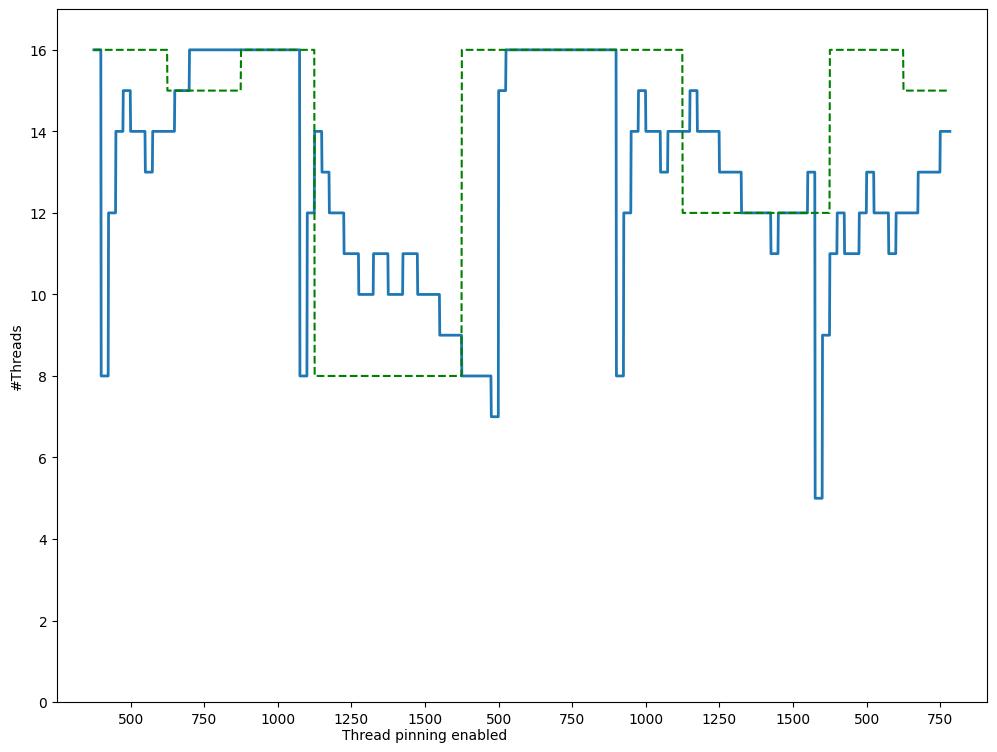

In [56]:
fig = plt.figure(figsize=(12,9))
fig.tight_layout()

x = fast.index

ax = sns.lineplot(x=x, y=fast['threads'], linewidth=2)
sns.lineplot(x=x, y=fast['optimum'], color='g', linestyle='--', ax=ax)

xticks = list(range(100, len(fast), 200))
xlabels = [f'{'' if i % 2 == 0 else ''}{fast['size'][x]}' for i, x in enumerate(xticks)]
xlabels[4] += '\nThread pinning enabled'
#xlabels[14] += '\nThread pinning disabled'
ax.set_xticks(xticks, labels=xlabels)

ax.set_xlabel('')
ax.set_ylabel('#Threads')
ax.set_xlim((-100,len(fast)+100))
ax.set_ylim((0,17))

fig.savefig('images/adapt_fast.png', bbox_inches='tight')
plt.show()

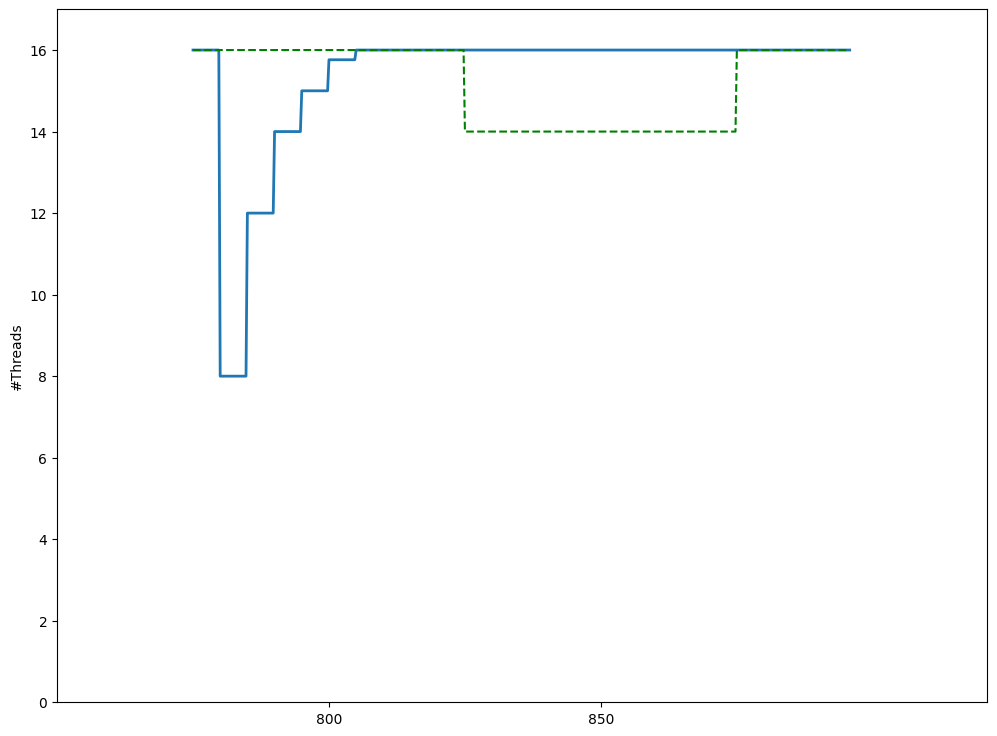

In [57]:
fig = plt.figure(figsize=(12,9))
fig.tight_layout()

x = slow.index

ax = sns.lineplot(x=x, y=slow['threads'], linewidth=2)
sns.lineplot(x=x, y=slow['optimum'], color='g', linestyle='--', ax=ax)

xticks = list(range(100, len(slow), 200))
xlabels = [f'{'' if i % 2 == 0 else ''}{slow['size'][x]}' for i, x in enumerate(xticks)]
#xlabels[4] += '\nThread pinning enabled'
#xlabels[14] += '\nThread pinning disabled'
ax.set_xticks(xticks, labels=xlabels)

ax.set_xlabel('')
ax.set_ylabel('#Threads')
ax.set_xlim((-100,len(slow)+100))
ax.set_ylim((0,17))

fig.savefig('images/adapt_slow.png', bbox_inches='tight')
plt.show()